In [8]:
#Importing libraries for data manipulation
import pandas as pd
import numpy as np

#Importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Importing tree based classfiers and ensamble learning classifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

#Importing library for train and test splitting
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Importing libraries for confusion matrix and accuracy extraction
from sklearn.metrics import confusion_matrix, accuracy_score

In [9]:
# loading the data 
data = pd.read_csv('C:/Users/bhavi/OneDrive/Desktop/Data/Wine.csv')

In [10]:
#Viewing the data
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [11]:
#Checking shape of the data
data.shape

(178, 14)

In [12]:
#Splitting data into X & y
X = data.drop(columns='Customer_Segment')
y = data['Customer_Segment']

In [21]:
#Splitting X & y data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42, stratify=y)

#Checking the shape of the data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((142, 13), (142,), (36, 13), (36,))

In [22]:
#Creating function who extract train a model and extract accuracy on different classifier
def classifier(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    cv = cross_val_score(estimator=model, X=x_train, y=y_train, scoring='accuracy', cv=10, n_jobs=-1)
    cv_score = cv.mean()
    return {'Accuracy':accuracy, 'CV Score':cv_score}

# Adaptive Boosting

In [25]:
#Creating Ada Boost classifier. by default decision tree is a base learner.
ad = AdaBoostClassifier(n_estimators=50)
classifier(ad, X_train, X_test, y_train, y_test)

{'Accuracy': 0.8055555555555556, 'CV Score': 0.9019047619047619}

# Gradient Boosting

In [28]:
#Creating Gradient Boosting classifier
gb = GradientBoostingClassifier(learning_rate=1.0)
#Extracting accuracy
classifier(gb, X_train, X_test, y_train, y_test)

{'Accuracy': 0.9722222222222222, 'CV Score': 0.9723809523809525}

# Extreme Gradient Boosting

In [32]:
#Creating Extreme Gradient Boosting classifier
egb = XGBClassifier(learning_rate=2.0)
#Extracting accuracy
classifier(egb, X_train, X_test, y_train, y_test)

{'Accuracy': 1.0, 'CV Score': 0.9647619047619047}

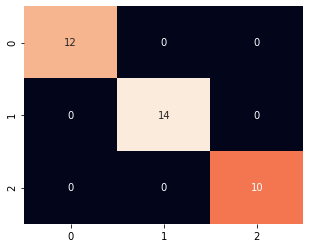

In [30]:
#Creating confusion matrix
y_pred = egb.predict(X_test)
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cbar=False);

In [24]:
#Evaluating the model with K fold cross validation
kfold = KFold(n_splits=8, shuffle=True, random_state=42)
cv = cross_val_score(egb, X=X_train, y=y_train, cv=kfold)
print(cv.mean())

0.9644607843137254
